In [1]:
from math import sqrt

import pandas as pd
from matplotlib import rcParams, pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

rcParams['figure.figsize'] = [12, 8]
rcParams['figure.dpi'] = 200

In [2]:
df = pd.read_csv('data/british airways.csv',
                 skiprows=1,
                 names=['ds', 'y'],
                 parse_dates=['ds'],
                 dtype={'y': float})

In [3]:
train_data, test_data = train_test_split(df, test_size=0.1, shuffle=False)

In [12]:
model = Prophet(mcmc_samples=100000, interval_width=0.99)
model.fit(train_data)

19:52:06 - cmdstanpy - INFO - CmdStan installation /Users/vasily/miniconda3/envs/time-series-with-bayesian-modelling/lib/python3.10/site-packages/prophet/stan_model/cmdstan-2.26.1 missing makefile, cannot get version.
19:52:06 - cmdstanpy - INFO - Cannot determine whether version is before 2.28.
19:52:06 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

19:56:17 - cmdstanpy - INFO - CmdStan done processing.
19:56:17 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in '/private/var/folders/d_/2qyqdfhs4wl8fq71xnsyxq080000gn/T/pip-install-bjvkgyqj/prophet_6cec3c01ad9e455e8c0ac4a7b41a083b/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in '/private/var/folders/d_/2qyqdfhs4wl8fq71xnsyxq080000gn/T/pip-install-bjvkgyqj/prophet_6cec3c01ad9e455e8c0ac4a7b41a083b/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in '/private/var/folders/d_/2qyqdfhs4wl8fq71xnsyxq080000gn/T/pip-install-bjvkgyqj/prophet_6cec3c01ad9e455e8c0ac4a7b41a083b/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in '

In [13]:
future = model.make_future_dataframe(periods=len(test_data) + 1, freq='M')
forecast = model.predict(future)

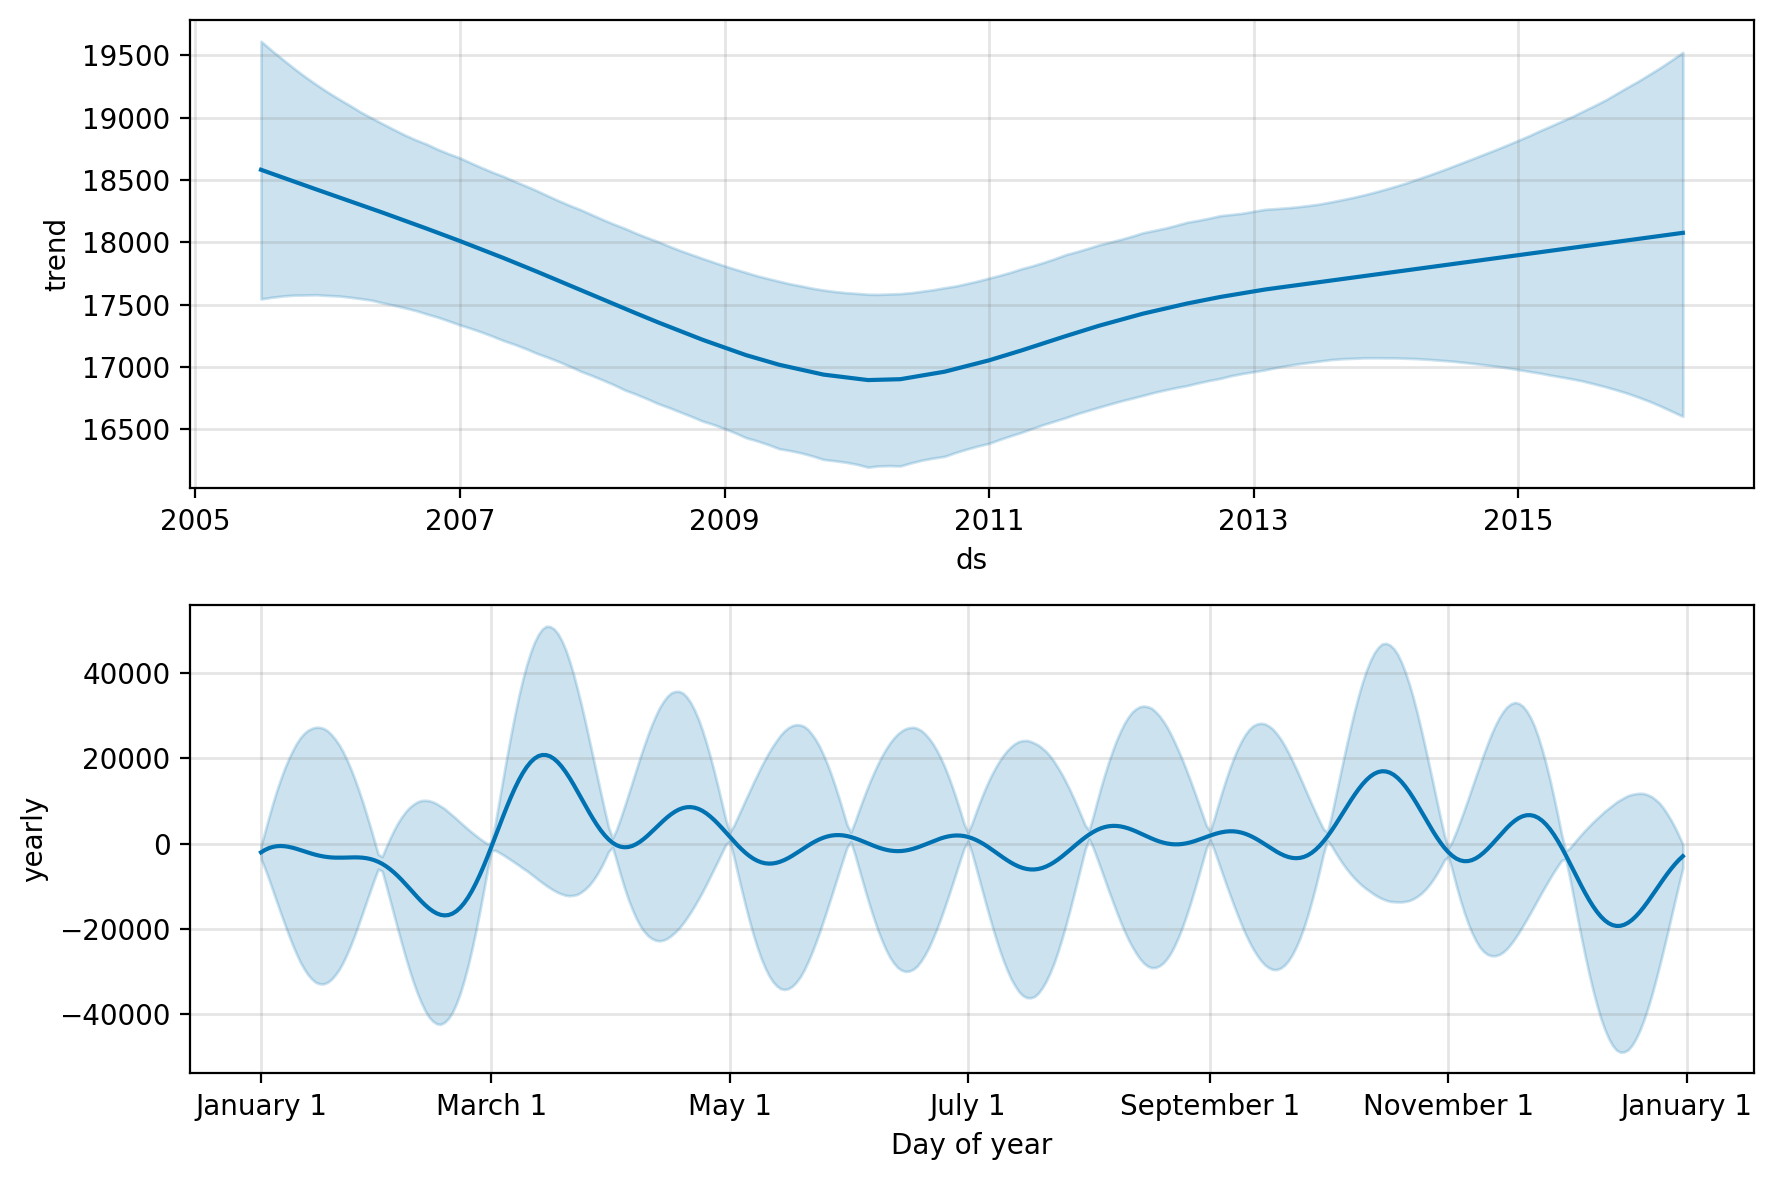

In [14]:
fig = model.plot_components(forecast)

In [15]:
rmse = sqrt(mean_squared_error(forecast[-len(test_data):]['yhat'], test_data['y']))
print('RMSE: %f' % rmse)

RMSE: 2657.937115


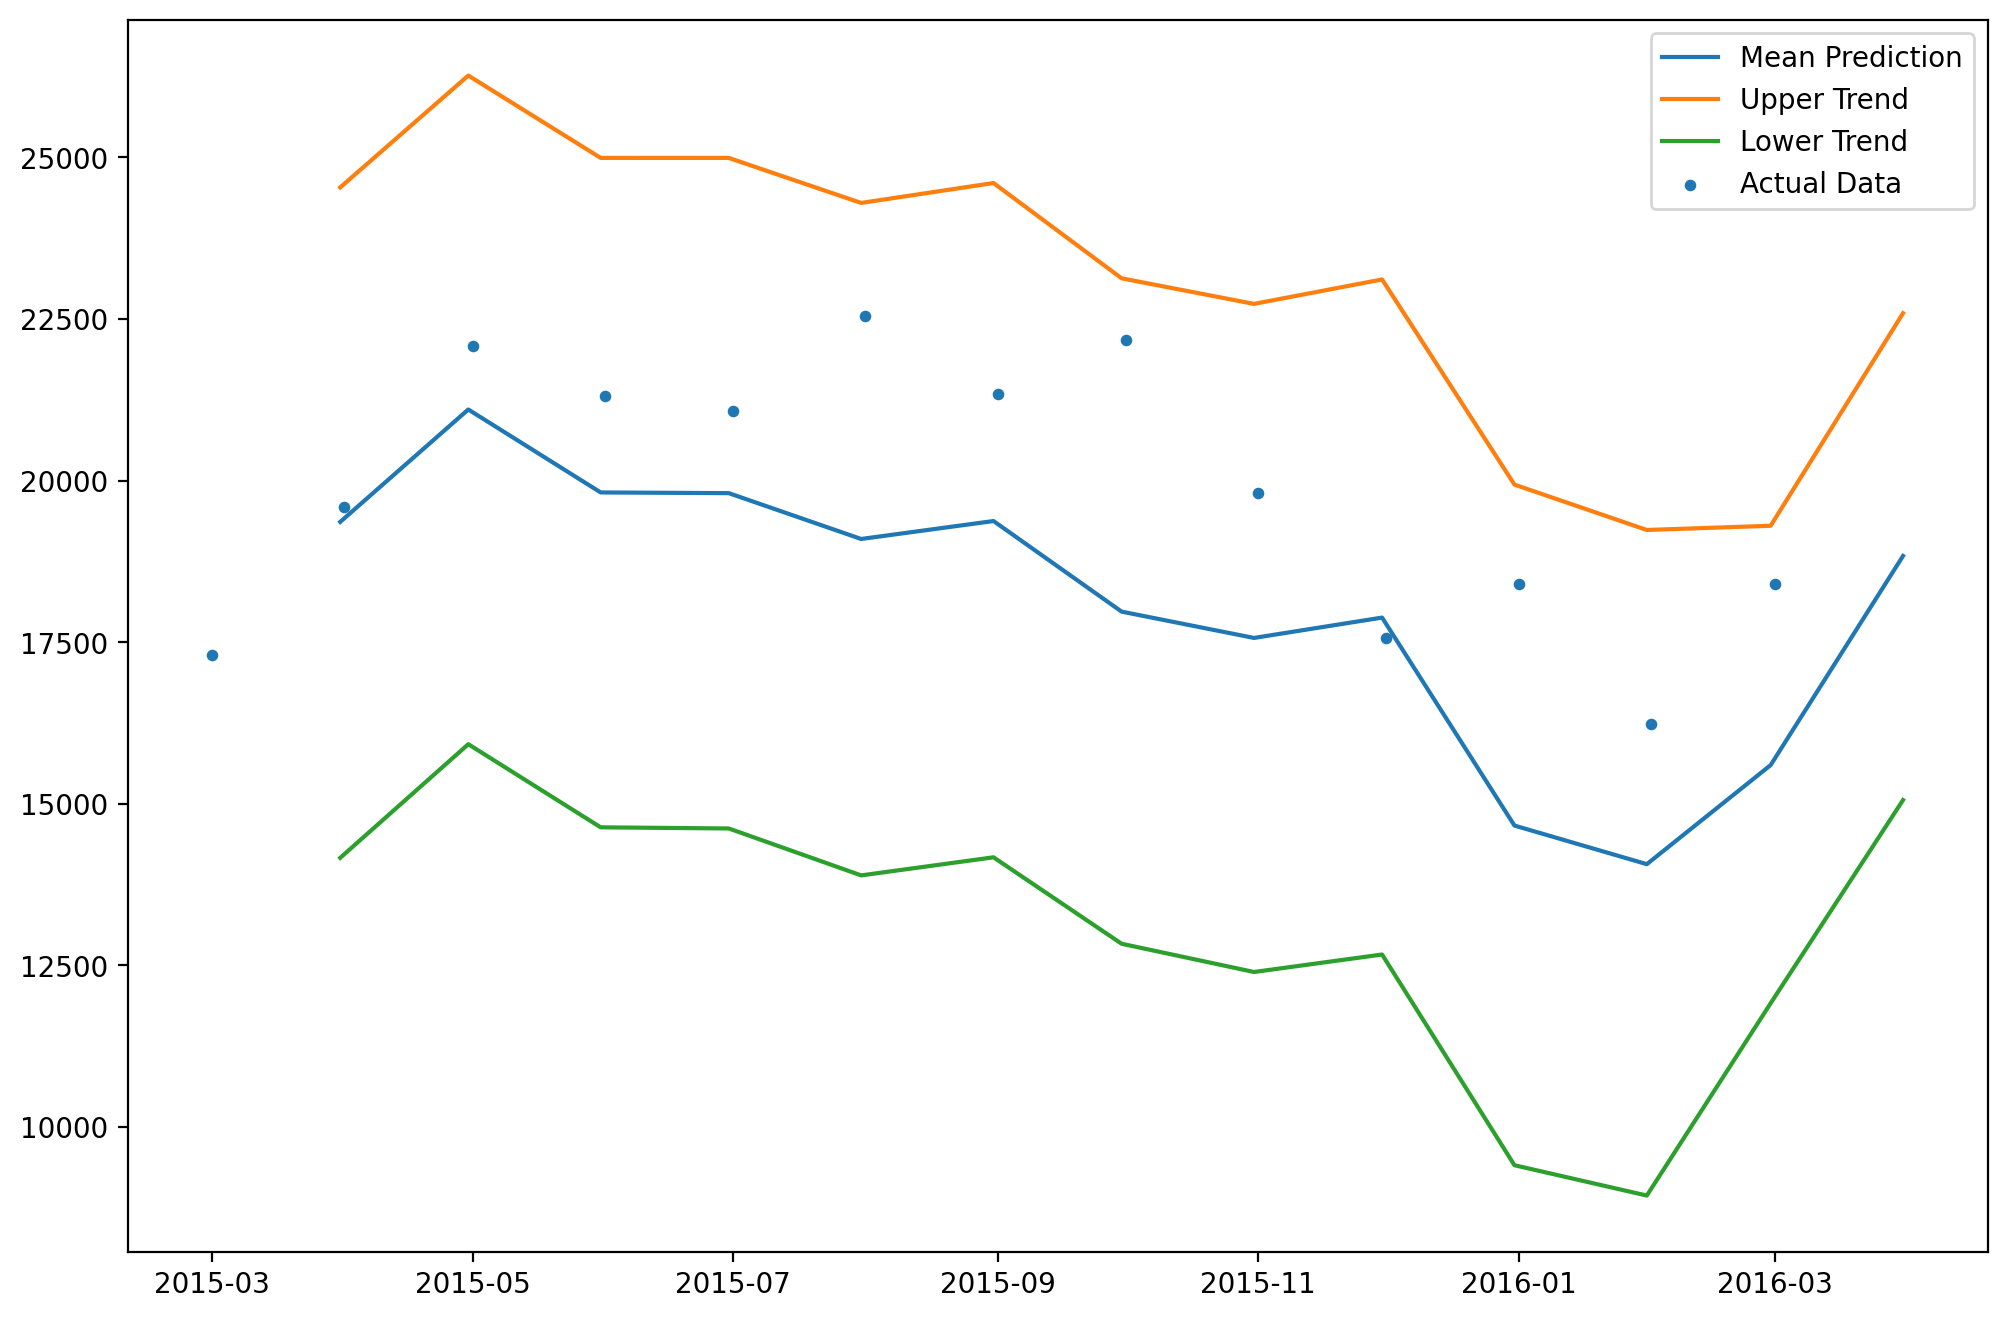

In [16]:
forecast_tail = forecast[-len(test_data):]

_, ax = plt.subplots()
ax.plot(forecast_tail['ds'], forecast_tail['yhat'], label='Mean Prediction')
ax.plot(forecast_tail['ds'], forecast_tail['yhat_upper'], label='Upper Trend')
ax.plot(forecast_tail['ds'], forecast_tail['yhat_lower'], label='Lower Trend')
ax.scatter(test_data['ds'], test_data['y'], label='Actual Data', s=10)
plt.legend()
plt.show()